---

# 0. Imports

---

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from PIL import Image

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [3]:
keras.__version__

'3.8.0'

---

# 1. Data

---

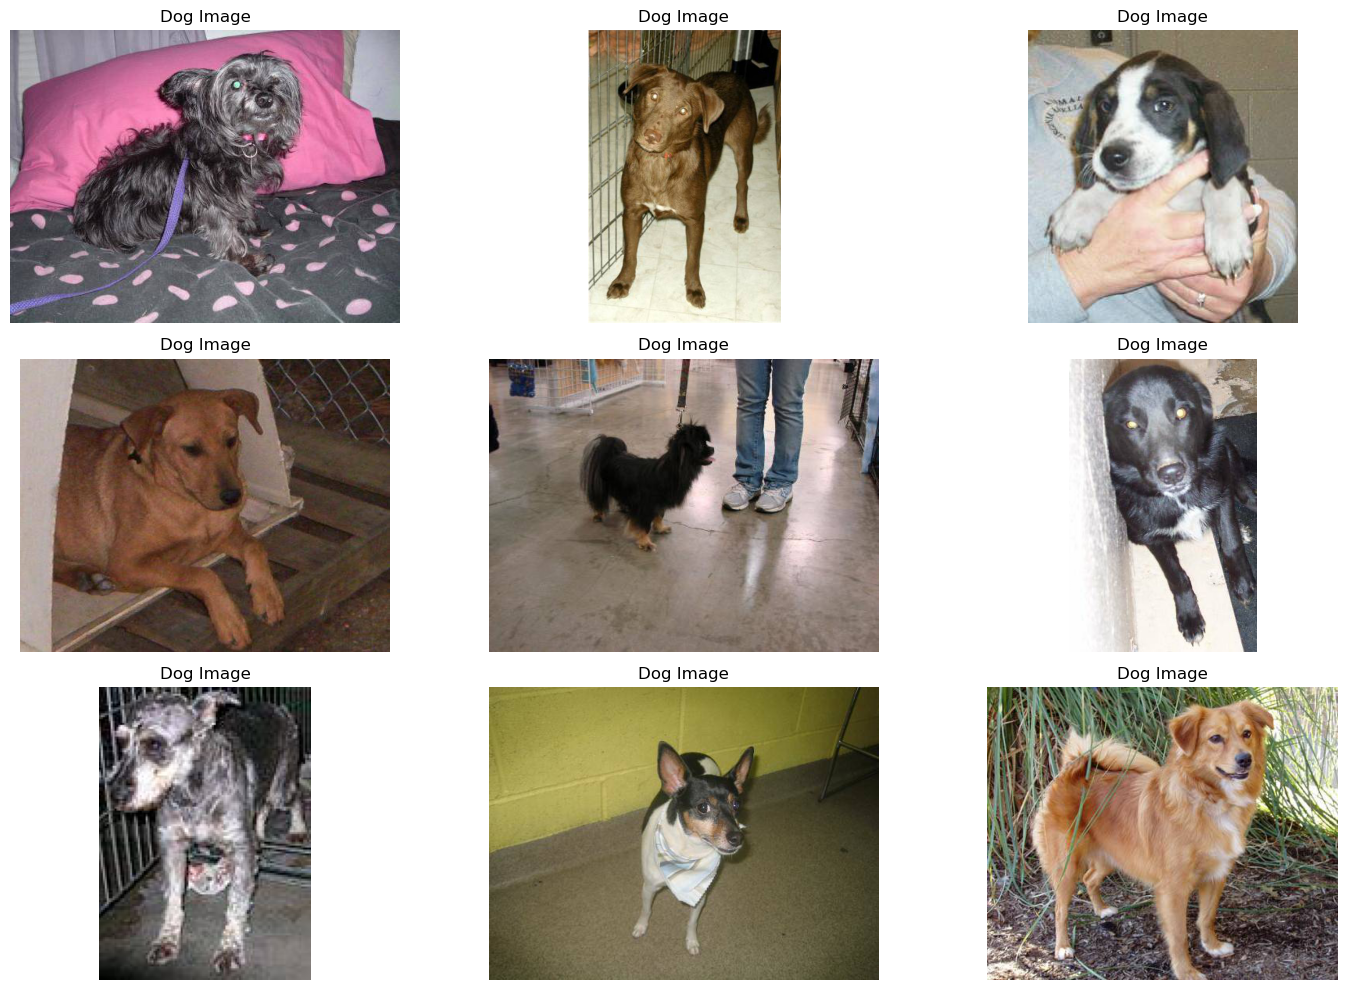

In [7]:
train_path = '../data/raw/train'
train_dogs = f'{train_path}/dog'
dog_files = [file for file in os.listdir(train_dogs)]

dog_images = []
for file in dog_files[:9]:
    img_array = image.img_to_array(image.load_img(f'{train_dogs}/{file}'))
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')
plt.tight_layout()
plt.show()

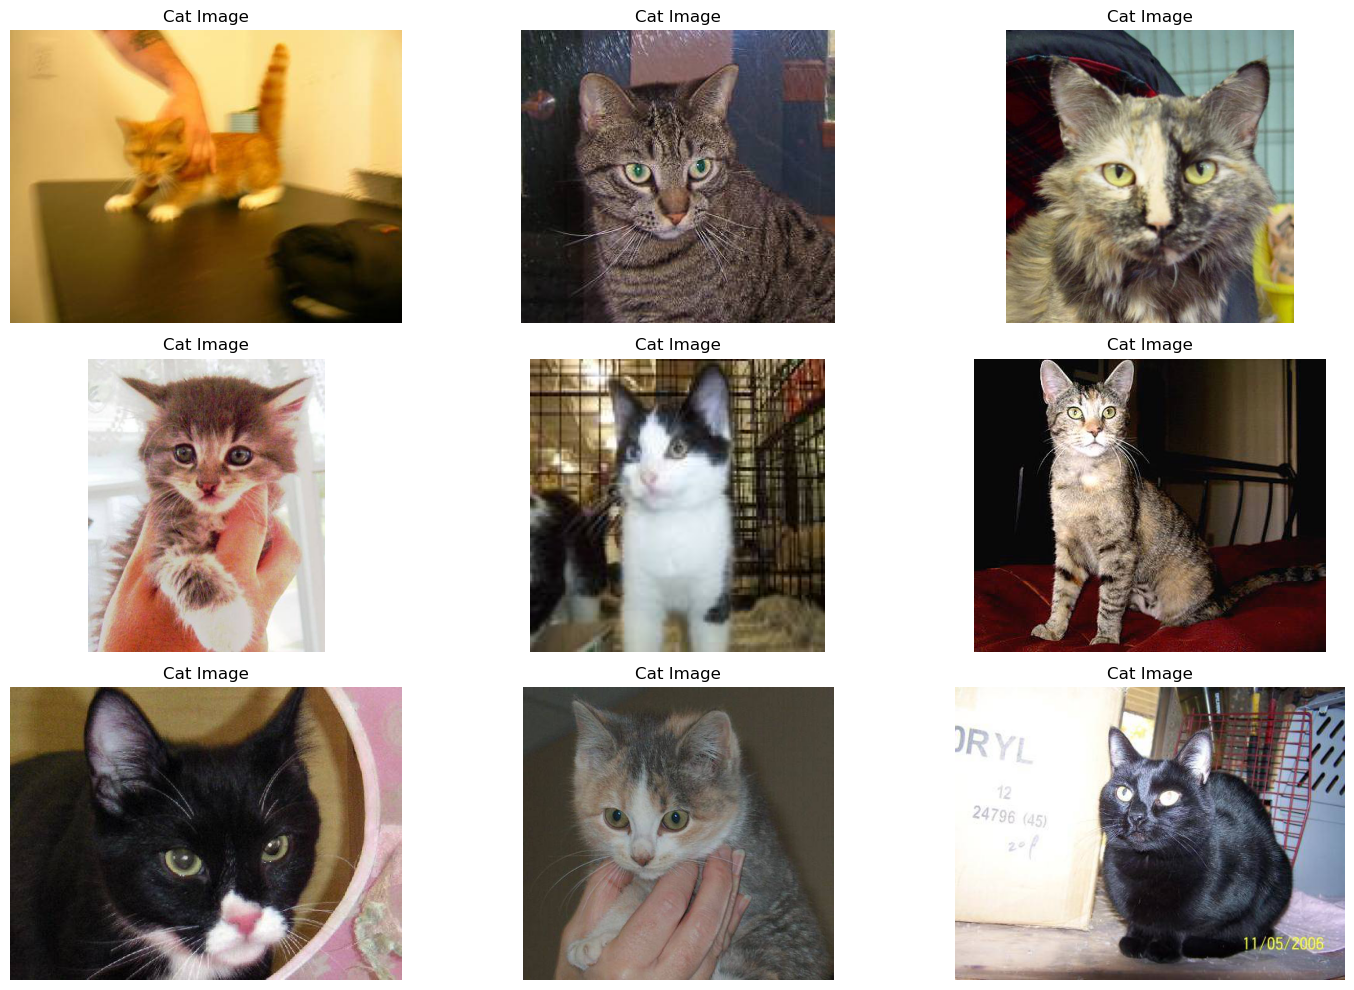

In [9]:
train_path = '../data/raw/train'
train_cats = f'{train_path}/cat'
cat_files = [file for file in os.listdir(train_cats)]

cat_images = []
for file in cat_files[:9]:
    img_array = image.img_to_array(image.load_img(f'{train_cats}/{file}'))
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Resized

In [ ]:
datagen = ImageDataGenerator()

train = datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    classes=['dog', 'cat'],
    batch_size=8, 
    class_mode='sparse'
)

test_path = '../data/raw'

test = datagen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    classes=["test1"],
    batch_size=8, 
    class_mode='sparse'
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


# 3. Modelado

In [30]:
model = Sequential()

model.add(Input(shape = (200,200,3)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [31]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

In [32]:
model.fit(train, epochs=1)

c:\Users\manue\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6408s 2s/step - accuracy: 0.4976 - loss: 30.5521


In [33]:
checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train, steps_per_epoch = 100, validation_data = test, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5095 - loss: 0.6932
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6905
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5253 - loss: 0.6930
Epoch 2: val_accuracy did not improve from 1.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5252 - loss: 0.6930 - val_accuracy: 1.0000 - val_loss: 0.6829
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4724 - loss: 0.6937
Epoch 3: val_accuracy did not improve from 1.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.4726 - loss: 0.6937 - val_accuracy: 1.0000 - val_loss: 0.6908


---

# 4. Testing Model

---

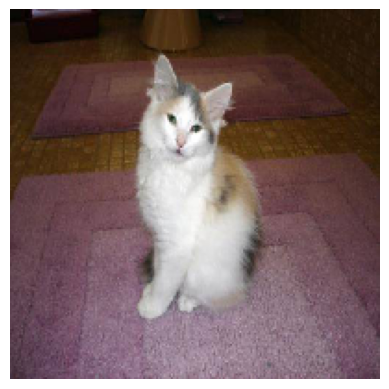

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
cat


In [76]:
img = load_img("../data/raw/test1/10.jpg", target_size=(200, 200))
img = np.asarray(img)

plt.imshow(img)
plt.axis("off")
plt.show()

img = np.expand_dims(img, axis=0)

saved_model = load_model("../models/vgg16_1.h5")

output = saved_model.predict(img)

if output[0][0] > output[0][1]: 
    print("cat") 
else:
    print("dog")  